# This notebook will serve for the initial EDA for the statistics data for the TFW project

In [1]:
# import necassary libriries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df_statistics = pd.read_csv('../data/statistics_20210707.csv')

In [3]:
# Shape of the dataset
print('The dataset contains %s different accommodations and %s features' %(df_statistics.shape[0], df_statistics.shape[1]))

The dataset contains 674604 different accommodations and 11 features


In [4]:
# Have a first look at the dataset
df_statistics.head()

,yearmonth,listing_id,inquiry_count,inquiry_volume,binding_inquiry_count,binding_inquiry_volume,direct_booking_count,direct_booking_volume,result_views,expose_views,phone_clicks
0,2019/07,f1133916-825e-5e2a-93be-eaba28a966e8,2,1352,0,0,0,0,1109,85,1
1,2019/07,836959d3-611c-5edb-887c-273aba5bd102,0,0,0,0,0,0,871,23,2
2,2019/07,4f5a70e1-41ba-5953-87a4-1a65899d7238,3,1028,0,0,0,0,827,172,1
3,2019/07,c47607f5-ee66-5810-9f91-5d545380eaae,3,1795,0,0,0,0,1756,135,1
4,2019/07,08893b93-fba8-5d85-9dd2-82a357301fb1,1,875,0,0,0,0,646,77,0


In [5]:
# First look at the info
df_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674604 entries, 0 to 674603
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   yearmonth               674604 non-null  object
 1   listing_id              674604 non-null  object
 2   inquiry_count           674604 non-null  int64 
 3   inquiry_volume          674604 non-null  int64 
 4   binding_inquiry_count   674604 non-null  int64 
 5   binding_inquiry_volume  674604 non-null  int64 
 6   direct_booking_count    674604 non-null  int64 
 7   direct_booking_volume   674604 non-null  int64 
 8   result_views            674604 non-null  int64 
 9   expose_views            674604 non-null  int64 
 10  phone_clicks            674604 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 56.6+ MB


In this dataset are no categorical features.

In [6]:
# First description of the numerical features
df_statistics.describe()

,inquiry_count,inquiry_volume,binding_inquiry_count,binding_inquiry_volume,direct_booking_count,direct_booking_volume,result_views,expose_views,phone_clicks
count,674604.000000,674604.000000,674604.000000,674604.000000,674604.000000,674604.000000,674604.000000,674604.000000,674604.000000
mean,2.256650,1351.015108,0.039610,27.999629,0.000181,0.115921,860.289911,130.545480,1.221540
std,6.882271,5256.753171,0.261278,221.803013,0.017131,12.143655,1182.950084,175.546061,2.521225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,320.000000,40.000000,0.000000
50%,1.000000,258.000000,0.000000,0.000000,0.000000,0.000000,640.000000,93.000000,0.000000
75%,3.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,1048.000000,170.000000,2.000000
max,694.000000,751680.000000,12.000000,16280.000000,4.000000,2705.000000,66849.000000,17693.000000,200.000000


## Feature converting

First, convert the date feature `yearmonth` to datetime.

In [7]:
# Convert column yearmonth to datetime
df_statistics['yearmonth'] = pd.to_datetime(df_statistics['yearmonth'])

## Looking for correlations

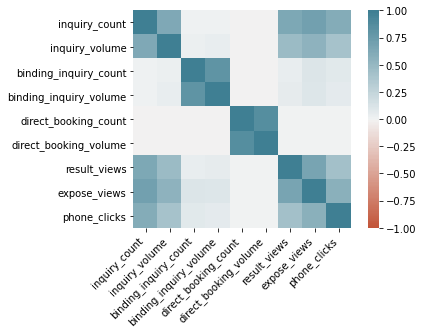

In [8]:
# Generate the heatmap
corr = df_statistics.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
corr.style.background_gradient(cmap='coolwarm')

,inquiry_count,inquiry_volume,binding_inquiry_count,binding_inquiry_volume,direct_booking_count,direct_booking_volume,result_views,expose_views,phone_clicks
inquiry_count,1.000000,0.639416,0.017907,0.018408,-0.002267,-0.001981,0.645921,0.697802,0.601654
inquiry_volume,0.639416,1.000000,0.026526,0.044739,-0.001695,-0.001350,0.473918,0.545979,0.412924
binding_inquiry_count,0.017907,0.026526,1.000000,0.810965,-0.001600,-0.001447,0.046412,0.110632,0.083301
binding_inquiry_volume,0.018408,0.044739,0.810965,1.000000,-0.001333,-0.001205,0.047723,0.102962,0.063643
direct_booking_count,-0.002267,-0.001695,-0.001600,-0.001333,1.000000,0.859496,0.004993,0.004787,0.000377
direct_booking_volume,-0.001981,-0.001350,-0.001447,-0.001205,0.859496,1.000000,0.004931,0.004603,0.000029
result_views,0.645921,0.473918,0.046412,0.047723,0.004993,0.004931,1.000000,0.671700,0.435901
expose_views,0.697802,0.545979,0.110632,0.102962,0.004787,0.004603,0.671700,1.000000,0.575619
phone_clicks,0.601654,0.412924,0.083301,0.063643,0.000377,0.000029,0.435901,0.575619,1.000000


## Grouping the statistic

### 1. Grouping by `yearmonth`

In [10]:
# Using groupby to summarize the statistics per yearmonth
statistic_per_month = df_statistics.groupby('yearmonth').sum().reset_index()
statistic_per_month

,yearmonth,inquiry_count,inquiry_volume,binding_inquiry_count,binding_inquiry_volume,direct_booking_count,direct_booking_volume,result_views,expose_views,phone_clicks
0,2019-01-01,87147,54076674,3720,2702151,6,2962,23683098,4813089,65396
1,2019-02-01,56165,32299591,2013,1317451,5,2281,16326123,3305636,44874
2,2019-03-01,51971,28687220,1986,1195634,7,2757,15682882,3148069,29702
3,2019-04-01,45587,23843128,1656,920203,3,2500,13544281,2871118,26383
4,2019-05-01,48523,25451127,1706,1002895,6,6124,14494968,3097081,36154
5,2019-06-01,53319,30093049,1232,727433,3,2190,22549219,3339460,33136
6,2019-07-01,70253,36236838,1632,1087782,6,3611,30079766,4113577,44427
7,2019-08-01,56328,31060592,948,632897,3,1198,29614978,4104966,36088
8,2019-09-01,60312,31725606,111,72758,6,4532,25566225,3592893,30592
9,2019-10-01,51663,29082102,132,105964,2,776,22869022,3235155,25838


### 2. Grouping by accommodation ID

In [11]:
# Using groupby to summarize the statistics per accommodation
statistic_per_id = df_statistics.groupby('listing_id').sum().reset_index()
statistic_per_id

,listing_id,inquiry_count,inquiry_volume,binding_inquiry_count,binding_inquiry_volume,direct_booking_count,direct_booking_volume,result_views,expose_views,phone_clicks
0,00005de7-6ed8-541b-be83-2573a46cd307,24,15945,0,0,0,0,13778,1645,4
1,0002653c-7e59-59a2-89f2-f6574ba14a0a,0,0,0,0,0,0,1498,42,0
2,0003f153-450a-5837-8a46-bd5db5b536b1,311,77485,0,0,0,0,41190,12212,94
3,00058d0d-579c-5b84-814b-8920fb5f1a27,27,7665,0,0,0,0,31752,3678,22
4,000cd267-f826-50f4-aa55-cec9aaa079ae,9,5135,0,0,0,0,4705,930,25
...,...,...,...,...,...,...,...,...,...,...
30264,ffedb526-cde3-54d6-9db9-f865ed0a0f13,55,32533,0,0,0,0,15972,4069,23
30265,fff6b775-e07f-578e-b4f6-a792426ce3aa,46,23691,12,7011,0,0,12394,2240,24
30266,fffed690-31dd-5409-bc1e-81121ec35345,12,6220,0,0,0,0,18766,1063,8
30267,ffffa8d1-d94a-5475-8e0d-2057495f4734,38,20465,0,0,0,0,17360,1731,9


### 3. Grouping by property and month

In [12]:
# Using groupby to summarize the statistics per accommodation
statistic_id_month = df_statistics.groupby(['listing_id', 'yearmonth']).sum().reset_index()
statistic_id_month

,listing_id,yearmonth,inquiry_count,inquiry_volume,binding_inquiry_count,binding_inquiry_volume,direct_booking_count,direct_booking_volume,result_views,expose_views,phone_clicks
0,00005de7-6ed8-541b-be83-2573a46cd307,2019-01-01,0,0,0,0,0,0,0,0,0
1,00005de7-6ed8-541b-be83-2573a46cd307,2019-02-01,0,0,0,0,0,0,0,0,0
2,00005de7-6ed8-541b-be83-2573a46cd307,2019-03-01,0,0,0,0,0,0,0,0,0
3,00005de7-6ed8-541b-be83-2573a46cd307,2019-04-01,0,0,0,0,0,0,0,0,0
4,00005de7-6ed8-541b-be83-2573a46cd307,2019-05-01,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
674599,ffffafae-e827-5f6a-9691-97b4e788d498,2020-08-01,0,0,0,0,0,0,0,0,0
674600,ffffafae-e827-5f6a-9691-97b4e788d498,2020-09-01,0,0,0,0,0,0,0,0,0
674601,ffffafae-e827-5f6a-9691-97b4e788d498,2020-10-01,0,0,0,0,0,0,0,0,0
674602,ffffafae-e827-5f6a-9691-97b4e788d498,2020-11-01,0,0,0,0,0,0,0,0,0


In [13]:
# Create a new dataframe for merging with master dataset
statistic_id_month = statistic_id_month.drop(['inquiry_count', 'inquiry_volume', 'binding_inquiry_count', 'binding_inquiry_volume', 'direct_booking_count', 'direct_booking_volume', 'phone_clicks'], axis=1)

In [14]:
# create two columns year and month
statistic_id_month['year'] = pd.DatetimeIndex(statistic_id_month['yearmonth']).year
statistic_id_month['month'] = pd.DatetimeIndex(statistic_id_month['yearmonth']).month

In [15]:
# Export csv
statistic_id_month.to_csv('../data/statistic_id_month_20210721.csv')

## Plotting distribution of the features by month

#### First, plotting the distribution of `count_inquiries` per month.

Text(0.5, 1.0, 'Overall Inquiries per Month (2019-2020)')

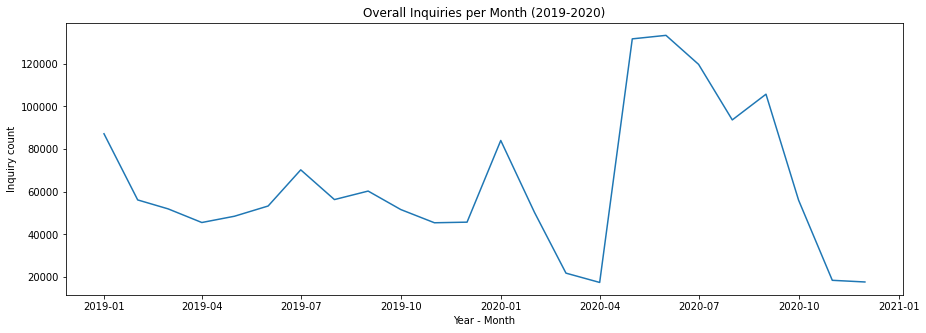

In [31]:
# Plotting a lineplot
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=statistic_per_month, x="yearmonth", y="inquiry_count")
ax.set(xlabel='Year - Month', ylabel='Inquiry count')
plt.title('Overall Inquiries per Month (2019-2020)')

It seems to be, that the corona pandemic influenced the inquiries. In 2019 the inquiries stay nearly at the same level and vary around 60000. From January 2020 to April 2020 (Lockdown) the inquiries decrease up to around 20000 and starts with April 2020 to increase more steeply to 130000. In September 2020 and October 2020 the inquiries decrease again back to 20000. During the corona pandemic many people didn't go on a journey or if they do, tried to stay in Germany.

#### Second, plotting the distribution of `direct_booking_count` per month

In [17]:
# Sum of direct bookings
print('Sum of direct bookings:', df_statistics.direct_booking_count.sum())

Sum of direct bookings: 122


<AxesSubplot:xlabel='yearmonth', ylabel='direct_booking_count'>

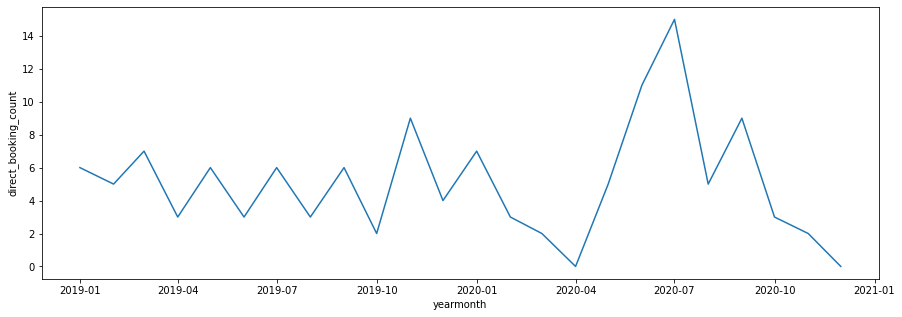

In [18]:
# Plotting a lineplot
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=statistic_per_month, x="yearmonth", y="direct_booking_count")

#### Third, plotting the distribution of `result_view`, `expose_view`, and `phone_clicks` per month

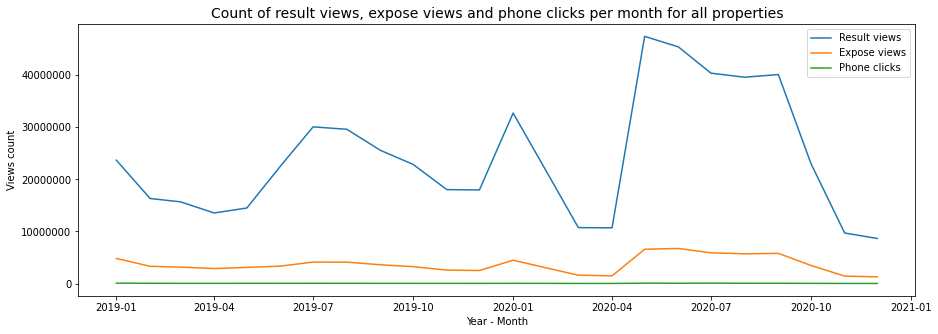

In [19]:
# Line plot result views
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=statistic_per_month, x="yearmonth", y="result_views")
sns.lineplot(data=statistic_per_month, x="yearmonth", y="expose_views")
sns.lineplot(data=statistic_per_month, x="yearmonth", y="phone_clicks")
ax.set(xlabel='Year - Month', ylabel='Views count')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(labels=["Result views","Expose views", "Phone clicks"])
plt.title('Count of result views, expose views and phone clicks per month for all properties', fontsize=14);

## Plotting distribution of the features by listing ID

#### First, plot the `inquiry_count` per accommodation 

<AxesSubplot:>

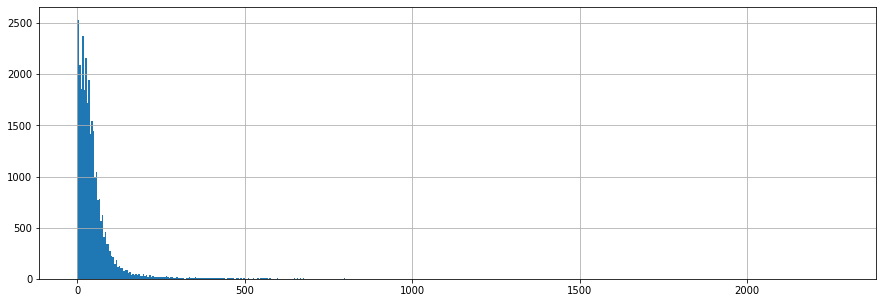

In [20]:
# Plotting a histogram
fig, ax = plt.subplots(figsize=(15,5))
statistic_per_id.inquiry_count.hist(bins=500)

<AxesSubplot:>

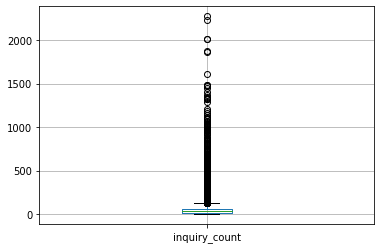

In [21]:
# Plotting a boxplot
statistic_per_id.boxplot(column=['inquiry_count'])

In [22]:
# Description of the feature inquiry_count
statistic_per_id.inquiry_count.describe()

count    30269.000000
mean        50.293865
std         81.380309
min          0.000000
25%         16.000000
50%         33.000000
75%         58.000000
max       2273.000000
Name: inquiry_count, dtype: float64

### 1. Assumption: average length of stay: 7 days
### 2. Assumption: a good occupancy rate is 50% of the year
### 3. Assumption: each third request generate a booking
### We need:  52 weeks per year / 50 % occupancy = 26 weeks per year --> 26 weeks per year * 3 request generate a booking = 78 inquiries are perfect!

How many houses have between 70 and 90 inquiries?

In [23]:
# Create a list with houses with perfect number of inquiries and count
property_inquiry_70_90 = statistic_per_id.query('inquiry_count >= 70 & inquiry_count <= 90')
len(property_inquiry_70_90)

2268

2268 houses have a perfect inquiry count! That's are 7.5 %.

How many houses have less and more inquiries?

In [24]:
# Count inquiries
print(statistic_per_id.query('inquiry_count >= 60 & inquiry_count <= 70')['listing_id'].count(), 'properties have between 60 and 70 inquiries.')
print(statistic_per_id.query('inquiry_count > 60')['listing_id'].count(), 'properties have less than 60 inquiries.')
print(statistic_per_id.query('inquiry_count >= 90 & inquiry_count <= 100')['listing_id'].count(), 'properties have between 90 and 100 inquiries.')
print(statistic_per_id.query('inquiry_count > 100')['listing_id'].count(), 'properties have more than 100 inquiries.')
print(statistic_per_id.query('inquiry_count >= 60 & inquiry_count <= 100')['listing_id'].count(), 'properties have between 60 and 100 inquiries.')

1832 properties have between 60 and 70 inquiries.
7118 properties have less than 60 inquiries.
695 properties have between 90 and 100 inquiries.
2764 properties have more than 100 inquiries.
4562 properties have between 60 and 100 inquiries.


#### Second, plot the `result_views`, `expose_views`, and `phone_clicks` per accommodation

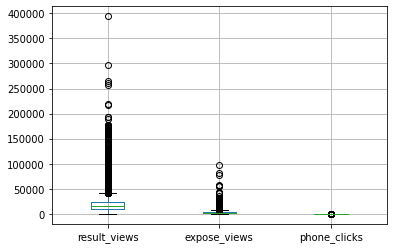

In [25]:
# Boxplot views and phone clicks
statistic_per_id.boxplot(column=['result_views', 'expose_views', 'phone_clicks']);

### Split the dataset into the years 2019 and 2020

In [26]:
# Split dataset: 2019
start_date = "2019-01-01"
end_date = "2019-12-1"

after_start_date = df_statistics["yearmonth"] >= start_date
before_end_date = df_statistics["yearmonth"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates_2019 = df_statistics.loc[between_two_dates]

In [27]:
# Split dataset: 2020
start_date = "2020-01-01"
end_date = "2020-12-31"

after_start_date = df_statistics["yearmonth"] >= start_date
before_end_date = df_statistics["yearmonth"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates_2020 = df_statistics.loc[between_two_dates]

In [28]:
# Using groupby to summarize the statistics per year and accommodation
statistic_per_id_2019 = filtered_dates_2019.groupby('listing_id').sum().reset_index()
statistic_per_id_2020 = filtered_dates_2020.groupby('listing_id').sum().reset_index()

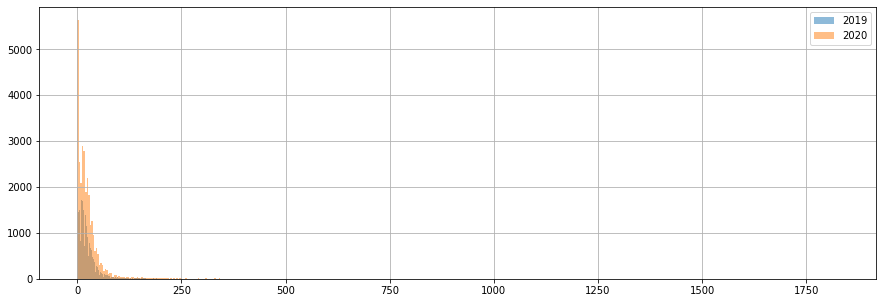

In [29]:
# Plotting a histogram
fig, ax = plt.subplots(figsize=(15,5))
statistic_per_id_2019.inquiry_count.hist(bins=500, alpha=0.5)
statistic_per_id_2020.inquiry_count.hist(bins=500, alpha=0.5)
ax.legend(['2019', '2020'])

In [30]:
print(statistic_per_id_2019.inquiry_count.describe())
print('--------------------------------------------')
print(statistic_per_id_2020.inquiry_count.describe())

count    28131.000000
mean        23.905620
std         31.839008
min          0.000000
25%          8.000000
50%         17.000000
75%         29.000000
max        900.000000
Name: inquiry_count, dtype: float64
--------------------------------------------
count    30269.000000
mean        28.076778
std         58.008412
min          0.000000
25%          7.000000
50%         17.000000
75%         32.000000
max       1827.000000
Name: inquiry_count, dtype: float64
